# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# 1. Perkenalan Dataset

Dataset ini berasal dari [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
yang juga dapat diakses secara langsung dari [tautan GitHub ini](https://github.com/datasciencedojo/datasets/raw/master/stroke-data.csv).

Tujuan dari dataset ini adalah untuk **memprediksi apakah seseorang berisiko terkena stroke (1) atau tidak (0)**
berdasarkan faktor-faktor medis dan gaya hidup.

**Deskripsi fitur:**
- `id` : ID unik untuk setiap pasien  
- `gender` : Jenis kelamin  
- `age` : Usia  
- `hypertension` : Tekanan darah tinggi (0 = tidak, 1 = ya)  
- `heart_disease` : Penyakit jantung (0 = tidak, 1 = ya)  
- `ever_married` : Status pernikahan  
- `work_type` : Jenis pekerjaan  
- `Residence_type` : Jenis tempat tinggal  
- `avg_glucose_level` : Kadar glukosa rata-rata  
- `bmi` : Body Mass Index  
- `smoking_status` : Status merokok  
- `stroke` : Target (1 = pernah mengalami stroke, 0 = tidak)

Dataset ini akan digunakan untuk membangun model klasifikasi binary.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# 2. Import Library

# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan modelling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Ignore warning agar output lebih rapi
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# 1. Buat folder penyimpanan
!mkdir -p ../stroke_dataset_raw

# 2. Unduh dataset Stroke dari Kaggle Mirror (link langsung)
!wget -O ../stroke_dataset_raw/stroke.csv https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

# 3. Cek hasil unduhan
!ls ../stroke_dataset_raw


--2025-11-13 15:51:03--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘../stroke_dataset_raw/stroke.csv’

../stroke_dataset_r 100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2025-11-13 15:51:03 (14.1 MB/s) - ‘../stroke_dataset_raw/stroke.csv’ saved [23873/23873]

stroke.csv


In [3]:
df = pd.read_csv('../stroke_dataset_raw/stroke.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Cek missing values
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Cek duplicated values
print(f"duplicated values : {df.duplicated().sum()}")

duplicated values : 0


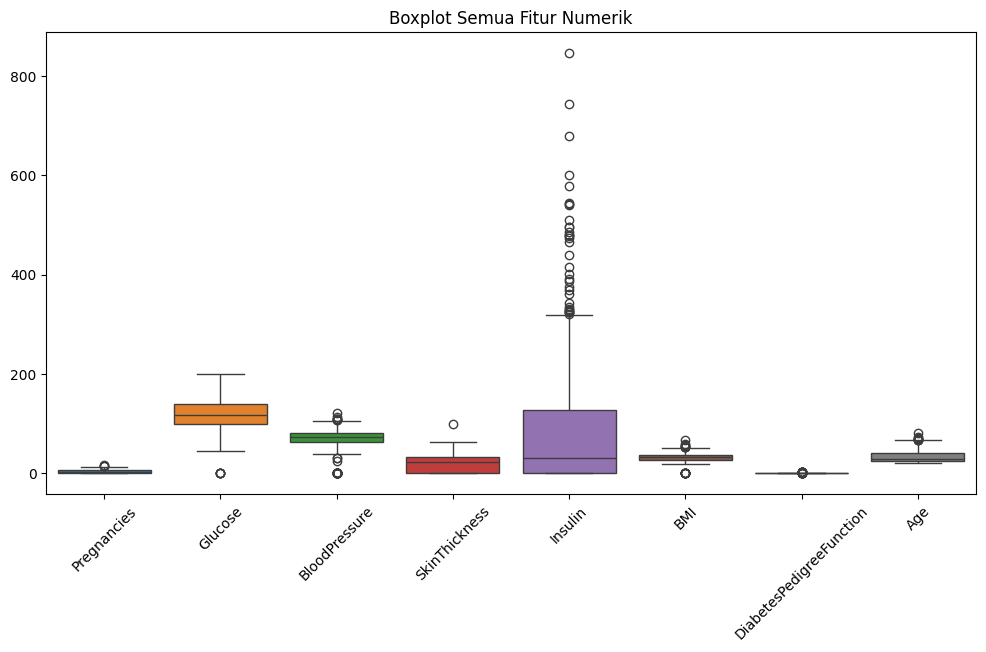

In [7]:
# Ambil kolom numerik dari dataset diabetes
numerik = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Tampilkan boxplot semua fitur numerik sekaligus
plt.figure(figsize=(12,6))
sns.boxplot(data=numerik)
plt.title('Boxplot Semua Fitur Numerik')
plt.xticks(rotation=45)
plt.show()


In [8]:
print(f"ukuran data : {df.shape}")

# Statistik deskriptif
df.describe()

ukuran data : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

# Mengecek jumlah missing value setelah penggantian
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
df.fillna(df.median(), inplace=True)


In [11]:
df.drop_duplicates(inplace=True)


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [13]:
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_scaled = scaler.fit_transform(X)


In [14]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[20, 30, 40, 50, 60, 70, 80],
                        labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])


In [26]:
# 1️⃣ Pastikan posisi kerja di /content
%cd /content

# 2️⃣ Buat folder dataset mentah dan hasil processing
!mkdir -p stroke_dataset_raw
!mkdir -p stroke_dataset_processed

# 3️⃣ Unduh dataset mentah (contoh: diabetes.csv)
!wget -O stroke_dataset_raw/diabetes.csv https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

# 4️⃣ Cek apakah dataset mentah sudah tersimpan
!ls stroke_dataset_raw

# 5️⃣ (Contoh) Simpan hasil processing ke folder lain
import pandas as pd

# Baca dataset mentah
df = pd.read_csv("stroke_dataset_raw/diabetes.csv")

# Misalnya kamu mau hilangkan nilai duplikat atau normalisasi
df_processed = df.drop_duplicates()

# Simpan hasil processing
df_processed.to_csv("stroke_dataset_processed/diabetes_processed.csv", index=False)

# 6️⃣ Cek file hasil processing
!ls stroke_dataset_processed


/content
--2025-11-13 15:58:56--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘stroke_dataset_raw/diabetes.csv’

stroke_dataset_raw/ 100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2025-11-13 15:58:56 (13.2 MB/s) - ‘stroke_dataset_raw/diabetes.csv’ saved [23873/23873]

diabetes.csv
diabetes_processed.csv


In [21]:
!ls ../stroke_dataset_preprocessing


diabetes_preprocessed.csv


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
